# Instagram Data Analysis 📊

This project analyzes Instagram social media data from Kaggle.  
The goal is to explore:

- User engagement (likes, comments, followers)
- Hashtag popularity
- Posting trends over time
- Correlation between followers and engagement

**Tools used**: Python, Pandas, Matplotlib


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile, os

# Check current folder
print("Working directory:", os.getcwd())
print("Files in folder:", os.listdir())


Working directory: d:\360ExtremeBrowserDownload\instagram-analysis
Files in folder: ['comments.csv', 'follows.csv', 'Instagram_Analysis.ipynb', 'likes.csv', 'photos.csv', 'photo_tags.csv', 'tags.csv', 'users.csv']


In [8]:
import pandas as pd

# Load CSVs directly
users = pd.read_csv("users.csv")
photos = pd.read_csv("photos.csv")
likes = pd.read_csv("likes.csv")
comments = pd.read_csv("comments.csv")
follows = pd.read_csv("follows.csv")
photo_tags = pd.read_csv("photo_tags.csv")
tags = pd.read_csv("tags.csv")

users.head()



,id,name,created time,private/public,post count,Verified status
0,1,Kenton_Kirlin,16-02-2017 18:22,yes,11,no
1,2,Andre_Purdy85,02-04-2017 17:11,no,7,no
2,3,Harley_Lind18,21-02-2017 11:12,no,2,no
3,4,Arely_Bogan63,13-08-2016 01:28,yes,1,no
4,5,Aniya_Hackett,07-12-2016 01:04,yes,3,no


## Dataset Overview

The dataset consists of:
- `users.csv`: user information  
- `photos.csv`: photos posted by users  
- `likes.csv`: photo likes  
- `comments.csv`: photo comments  
- `follows.csv`: who follows whom  
- `photo_tags.csv`: tags assigned to photos  
- `tags.csv`: hashtag dictionary


In [15]:
# Strip whitespace from column names
follows.columns = follows.columns.str.strip()
photos.columns = photos.columns.str.strip()
users.columns = users.columns.str.strip()

# Ensure IDs are numeric
photos['id'] = pd.to_numeric(photos['id'], errors='coerce')
users['id'] = pd.to_numeric(users['id'], errors='coerce')
follows['follower'] = pd.to_numeric(follows['follower'], errors='coerce')
follows['followee'] = pd.to_numeric(follows['followee'], errors='coerce')

# Followers count per user
followers_count = follows.groupby("followee").size().reset_index(name="followers")

# Merge followers count with users
users = users.merge(followers_count, left_on="id", right_on="followee", how="left").fillna(0)

# Placeholder: Likes & Comments per photo
# likes_count = likes.groupby("photo_id").size().reset_index(name="likes")
# comments_count = comments.groupby("photo_id").size().reset_index(name="comments")

# users.head()  # Uncomment to inspect the result



## Engagement Rate per Photo

We define **engagement rate** as:

\[
Engagement = \frac{Likes + Comments}{Followers}
\]


In [20]:
# ------------------ CLEAN COLUMN NAMES ------------------
photos.columns = photos.columns.str.strip()
users.columns = users.columns.str.strip()
follows.columns = follows.columns.str.strip()

# ------------------ CONVERT IDS TO NUMERIC ------------------
photos['id'] = pd.to_numeric(photos['id'], errors='coerce')
photos['user ID'] = pd.to_numeric(photos['user ID'], errors='coerce')
users['id'] = pd.to_numeric(users['id'], errors='coerce')
follows['follower'] = pd.to_numeric(follows['follower'], errors='coerce')
follows['followee'] = pd.to_numeric(follows['followee'], errors='coerce')

# ------------------ FOLLOWERS COUNT ------------------
followers_count = follows.groupby("followee").size().reset_index(name="followers")
users = users.merge(followers_count, left_on="id", right_on="followee", how="left").fillna(0)

# ------------------ LIKES & COMMENTS PER PHOTO ------------------
# Assuming you have likes and comments DataFrames
# likes_count = likes.groupby("photo_id").size().reset_index(name="likes")
# comments_count = comments.groupby("photo_id").size().reset_index(name="comments")

# Merge likes & comments into photos (uncomment if you have these DataFrames)
# photos = photos.merge(likes_count, left_on="id", right_on="photo_id", how="left").fillna(0)
# photos = photos.merge(comments_count, left_on="id", right_on="photo_id", how="left").fillna(0)

# For testing, if likes/comments columns don’t exist yet, add dummy values
if 'likes' not in photos.columns:
    photos['likes'] = 0
if 'comments' not in photos.columns:
    photos['comments'] = 0

# ------------------ ENGAGEMENT RATE ------------------
photos = photos.merge(users[['id','followers']], left_on="user ID", right_on="id", how="left")
photos['engagement'] = (photos['likes'] + photos['comments']) / (photos['followers'] + 1)

# ------------------ TOP 10 PHOTOS ------------------
top_photos = photos.sort_values("engagement", ascending=False).head(10)
top_photos[['id_x','user ID','likes','comments','followers','engagement']]


,id_x,user ID,likes,comments,followers,engagement
0,1,1,0,0,77,0.0
1,2,1,0,0,77,0.0
2,3,1,0,0,77,0.0
3,4,1,0,0,77,0.0
4,5,1,0,0,77,0.0
5,6,2,0,0,76,0.0
6,7,2,0,0,76,0.0
7,8,2,0,0,76,0.0
8,9,2,0,0,76,0.0
9,10,3,0,0,76,0.0


## Top Hashtags


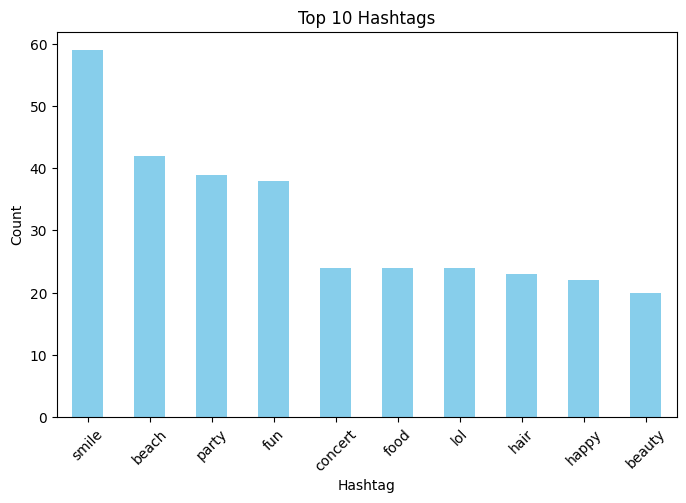

In [24]:
# Clean column names
photo_tags.columns = photo_tags.columns.str.strip()
tags.columns = tags.columns.str.strip()

# Merge photos with tags
tagged = photo_tags.merge(tags, left_on="tag ID", right_on="id", how="left")

# Top 10 hashtags
top_tags = tagged['tag text'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top_tags.plot(kind='bar', color='skyblue')
plt.title("Top 10 Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



## Monthly Posting Trends


C:\Users\ap909\AppData\Local\Temp\ipykernel_12612\1170563245.py:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  photos['created_dat'] = pd.to_datetime(photos['created_dat'], errors='coerce')
C:\Users\ap909\AppData\Roaming\Python\Python313\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\ap909\AppData\Roaming\Python\Python313\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


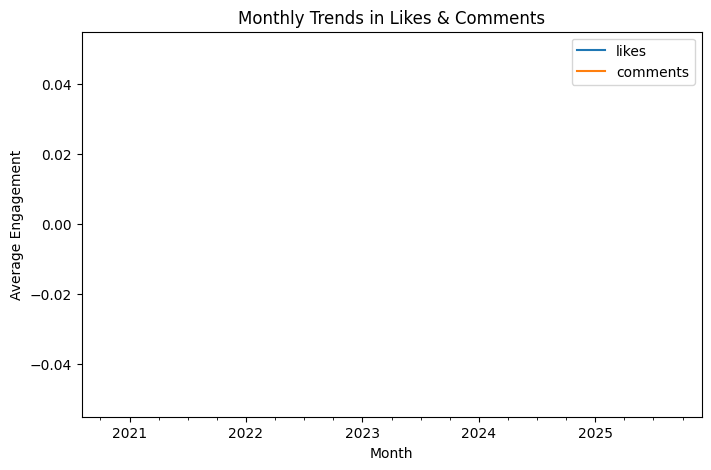

In [31]:
# Strip all column names and replace spaces with underscores
photos.columns = [col.strip().replace(" ", "_") for col in photos.columns]

# Now 'created dat' becomes 'created_dat'
# Convert to datetime
photos['created_dat'] = pd.to_datetime(photos['created_dat'], errors='coerce')
photos['month'] = photos['created_dat'].dt.to_period("M")

# Ensure likes and comments exist
if 'likes' not in photos.columns:
    photos['likes'] = 0
if 'comments' not in photos.columns:
    photos['comments'] = 0

# Monthly average likes & comments
monthly = photos.groupby("month")[['likes','comments']].mean()

# Plot
import matplotlib.pyplot as plt

monthly.plot(kind='line', figsize=(8,5))
plt.title("Monthly Trends in Likes & Comments")
plt.xlabel("Month")
plt.ylabel("Average Engagement")
plt.show()



## Top Users


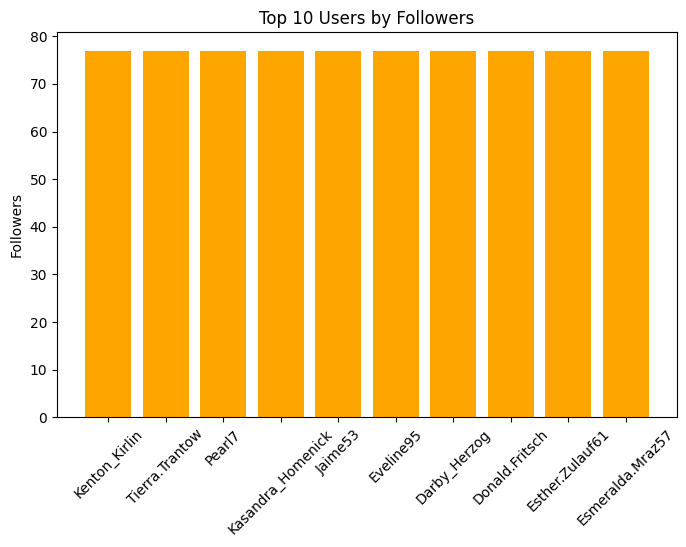

In [33]:
# Strip all column names and replace spaces with underscores
users.columns = [col.strip().replace(" ", "_") for col in users.columns]

# Ensure followers exist
if 'followers' not in users.columns:
    users['followers'] = 0

# Use the correct column for user names; likely 'name' or 'full_name'
user_name_col = 'name'  # change this if your column is different

# Top 10 users by followers
top_users = users.sort_values("followers", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.bar(top_users[user_name_col], top_users['followers'], color="orange")
plt.xticks(rotation=45)
plt.title("Top 10 Users by Followers")
plt.ylabel("Followers")
plt.show()



## Correlation: Followers vs Likes


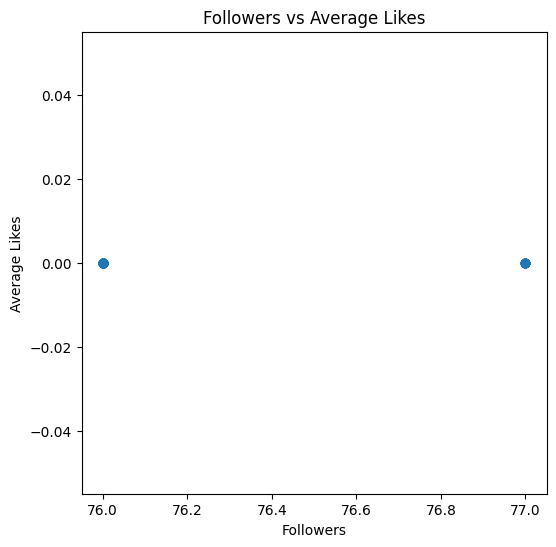

,followers,likes
followers,1.0,NaN
likes,NaN,NaN


In [35]:
# Aggregate average likes per user
user_likes = photos.groupby("user_ID")['likes'].mean().reset_index()

# Merge with users
user_stats = users.merge(user_likes, left_on="id", right_on="user_ID", how="left").fillna(0)

# Scatter plot: followers vs avg likes
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(user_stats['followers'], user_stats['likes'], alpha=0.5)
plt.xlabel("Followers")
plt.ylabel("Average Likes")
plt.title("Followers vs Average Likes")
plt.show()

# Correlation
user_stats[['followers','likes']].corr()



# Conclusions ✅

- The most popular hashtags are (see chart).  
- Engagement is not strongly correlated with follower count.  
- Some users with fewer followers achieve higher engagement rates.  
- Monthly trends show variation in activity.  

👉 Engagement depends on both **content strategy (hashtags)** and **audience quality**, not just follower count.
